# Investigation of Social Media on Mental Health
Author: __Aidan Cone__

# Introduction
Social media has become a large part of our lives, with many people spending hours a day on social media platforms such as Instagram, Facebook, and Twitter. However, there has been a lot of research into the negative effects of social media on mental health, including depression, anxiety, and stress. In this project, I will be investigating the relationship between social media use and mental health factors such as depression, worry/stress, restlessness, and sleep issues.
<br>
The dataset I will be using is from Kaggle. This dataset was originally collected for a data science and machine learning project that aimed at investigating the potential correlation between the amount of time an individual spends on social media and the impact it has on their mental health.
<br>
For all scales used in the dataset, 1 is the lowest and 5 is the highest for the respective measurement.

# Data Source
[Social Media and Mental Health](https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data)
__Authors:__ Souvik Ahmed and Muhesena Nasiha Syeda
__Last Update:__ 6 months ago as of 04 JAN 2024

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning
Here, we will clean the data to make it more readable and easier to work with.

In [41]:
df = pd.read_csv('smmh.csv')

In [42]:
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [43]:
df.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [44]:
df.shape

(481, 21)

In [45]:
# Rename columns to something more readable
new_column_names = {
    "1. What is your age?": "age", 
    "2. Gender": "gender", 
    "3. Relationship Status": "relationship_status", 
    "4. Occupation Status": "occupation_status",
    "5. What type of organizations are you affiliated with?": "organization_type",
    "6. Do you use social media?": "use_social_media",
    "7. What social media platforms do you commonly use?": "social_media_platforms",
    "8. What is the average time you spend on social media every day?" : "avg_time_spent_on_social_media",
    "9. How often do you find yourself using Social media without a specific purpose?": "use_social_media_without_purpose",
    "10. How often do you get distracted by Social media when you are busy doing something?": "get_distracted_by_social_media",
    "11. Do you feel restless if you haven't used Social media in a while?": "feel_restless_without_social_media",
    "12. On a scale of 1 to 5, how easily distracted are you?": "distractibility_scale",
    "13. On a scale of 1 to 5, how much are you bothered by worries?": "worry_scale",
    "14. Do you find it difficult to concentrate on things?": "difficulty_concentrating",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?": "compare_to_successful_people_scale",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?": "feel_about_comparisons",
    "17. How often do you look to seek validation from features of social media?": "seek_validation",
    "18. How often do you feel depressed or down?": "depression",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?" : "interest_fluctuation_scale",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?" : "sleep_issues_scale"
}

In [46]:
df = df.rename(columns=new_column_names)
df.head()

,Timestamp,age,gender,relationship_status,occupation_status,organization_type,use_social_media,social_media_platforms,avg_time_spent_on_social_media,use_social_media_without_purpose,...,feel_restless_without_social_media,distractibility_scale,worry_scale,difficulty_concentrating,compare_to_successful_people_scale,feel_about_comparisons,seek_validation,depression,interest_fluctuation_scale,sleep_issues_scale
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Since we are using avg_time_on_social_media later and it is in categories, we will convert it to a numerical value.

In [47]:
# Convert average time spent on social media to numeric value
def convert_time_category_to_value(time_category):
    if time_category == "More than 5 hours":
        return 6
    elif time_category == "Between 4 and 5 hours":
        return 4.5
    elif time_category == "Between 3 and 4 hours":
        return 3.5
    elif time_category == "Between 2 and 3 hours":
        return 2.5
    elif time_category == "Between 1 and 2 hours":
        return 1.5
    elif time_category == "Less than an Hour":
        return 0.5
    else:
        return None 

df['avg_time_spent_on_social_media'] = df['avg_time_spent_on_social_media'].apply(convert_time_category_to_value)

In [48]:
# Making sure no null values present
print(df.isnull().sum())

Timestamp                              0
age                                    0
gender                                 0
relationship_status                    0
occupation_status                      0
organization_type                     30
use_social_media                       0
social_media_platforms                 0
avg_time_spent_on_social_media         0
use_social_media_without_purpose       0
get_distracted_by_social_media         0
feel_restless_without_social_media     0
distractibility_scale                  0
worry_scale                            0
difficulty_concentrating               0
compare_to_successful_people_scale     0
feel_about_comparisons                 0
seek_validation                        0
depression                             0
interest_fluctuation_scale             0
sleep_issues_scale                     0
dtype: int64


In [49]:
# Impute null values with most common value (which is university)
mode_value = df['organization_type'].mode()[0]
df['organization_type'] = df['organization_type'].fillna(mode_value)

In [50]:
# Check if null values are imputed
print(df.isnull().sum())

Timestamp                             0
age                                   0
gender                                0
relationship_status                   0
occupation_status                     0
organization_type                     0
use_social_media                      0
social_media_platforms                0
avg_time_spent_on_social_media        0
use_social_media_without_purpose      0
get_distracted_by_social_media        0
feel_restless_without_social_media    0
distractibility_scale                 0
worry_scale                           0
difficulty_concentrating              0
compare_to_successful_people_scale    0
feel_about_comparisons                0
seek_validation                       0
depression                            0
interest_fluctuation_scale            0
sleep_issues_scale                    0
dtype: int64


In [51]:
# Check duplicates
df.duplicated().sum()

0

In [52]:
# Rename 'There are others???' to 'Other'
df.replace('There are others???', 'Other', inplace=True)

In [53]:
unique_genders = df['gender'].unique()

for gender in unique_genders:
    print(gender)

Male
Female
Nonbinary 
Non-binary
NB
unsure 
Trans
Non binary 
Other


# Descriptive Statistics
Here, we will examine the data a little more to see if there are any interesting trends or patterns.

In [54]:
df.describe()

,age,avg_time_spent_on_social_media,use_social_media_without_purpose,get_distracted_by_social_media,feel_restless_without_social_media,distractibility_scale,worry_scale,difficulty_concentrating,compare_to_successful_people_scale,feel_about_comparisons,seek_validation,depression,interest_fluctuation_scale,sleep_issues_scale
count,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.13659,3.529106,3.553015,3.320166,2.588358,3.349272,3.559252,3.245322,2.831601,2.775468,2.455301,3.255717,3.170478,3.201663
std,9.91511,1.755107,1.096299,1.328137,1.257059,1.175552,1.283356,1.347105,1.407835,1.056479,1.247739,1.313033,1.256666,1.461619
min,13.00000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.00000,2.500000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
50%,22.00000,3.500000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,26.00000,4.500000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000
max,91.00000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Mean age: 26.13659043659044


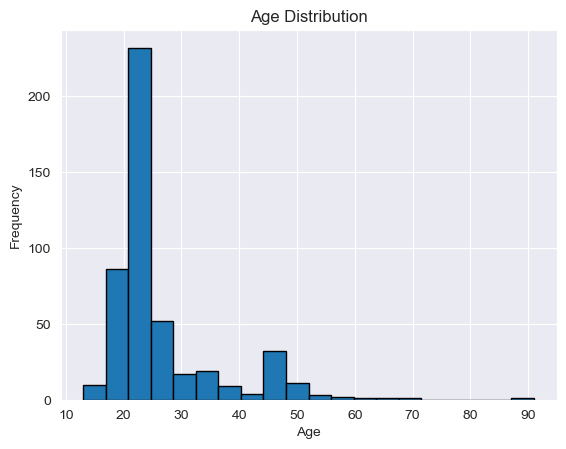

In [55]:
# Plot age distribution and find mean
print(f"Mean age: {df['age'].mean()}")
df['age'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

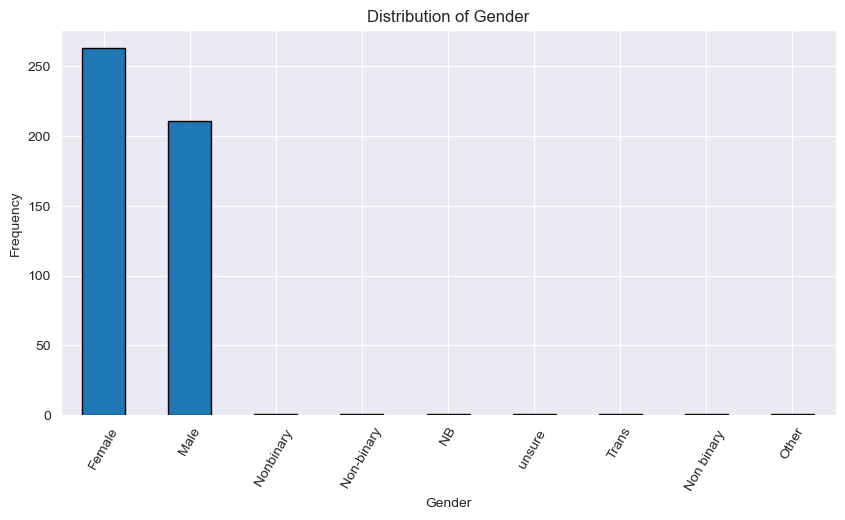

In [56]:
# Plot distributions of gender by a bar chart
gender_distribution = df['gender'].value_counts()

plt.figure(figsize=(10, 5))
gender_distribution.plot.bar(edgecolor='black')
plt.ylabel("Frequency")
plt.xlabel("Gender")
plt.title("Distribution of Gender")
plt.xticks(rotation=60)
plt.show()

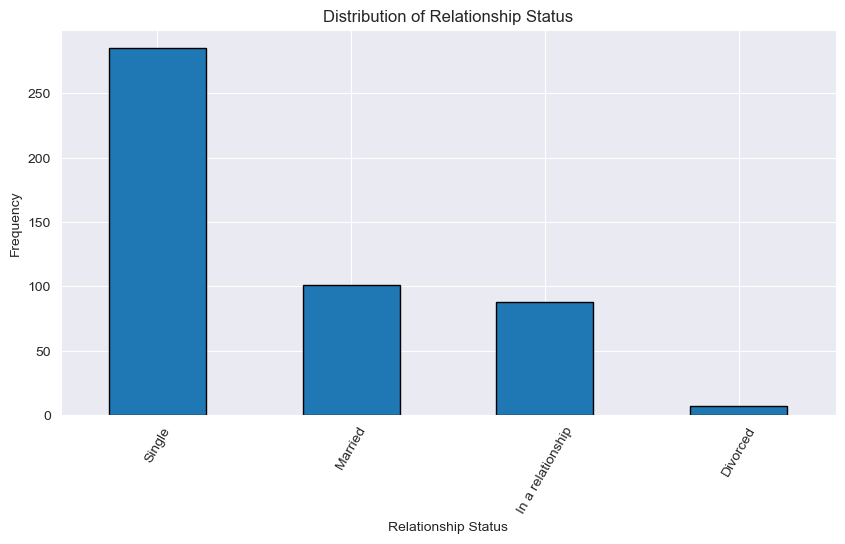

In [57]:
# Plot distributions of relationship status by a bar chart
relationship_status_distribution = df['relationship_status'].value_counts()

plt.figure(figsize=(10, 5))
relationship_status_distribution.plot.bar(edgecolor='black')
plt.ylabel("Frequency")
plt.xlabel("Relationship Status")
plt.title("Distribution of Relationship Status")
plt.xticks(rotation=60)
plt.show()

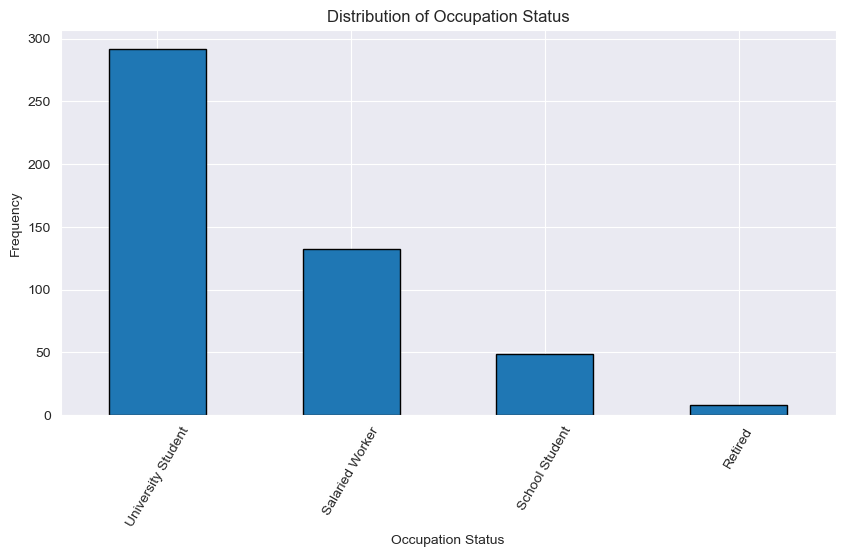

In [58]:
# Plot distributions of occupation status by a bar chart
occupation_status_distribution = df['occupation_status'].value_counts()

plt.figure(figsize=(10, 5))
occupation_status_distribution.plot.bar(edgecolor='black')
plt.ylabel("Frequency")
plt.xlabel("Occupation Status")
plt.title("Distribution of Occupation Status")
plt.xticks(rotation=60)
plt.show()

In [59]:
# Find top 5 most common social media platforms and their counts
social_media_platforms = df['social_media_platforms'].str.split(', ', expand=True).stack().value_counts()
social_media_platforms.head()

YouTube      412
Facebook     407
Instagram    359
Discord      198
Snapchat     181
Name: count, dtype: int64

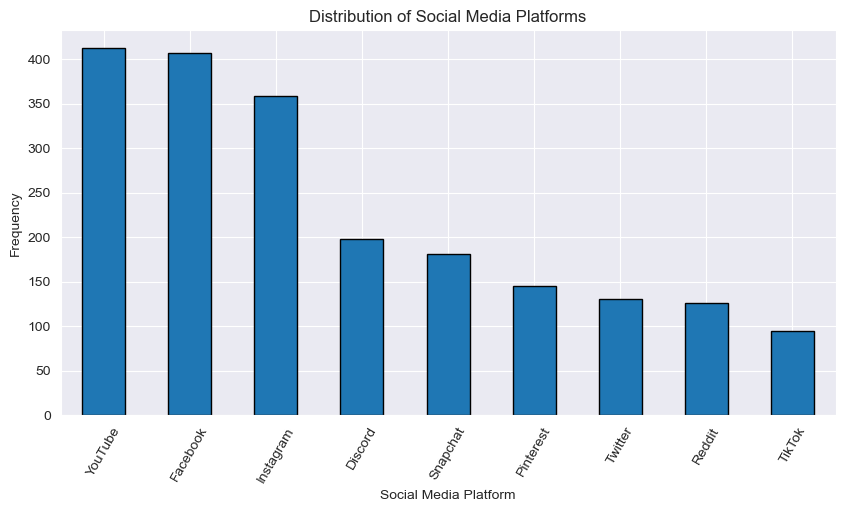

In [60]:
# Plot social media platforms by a bar chart
plt.figure(figsize=(10, 5))
social_media_platforms.plot.bar(edgecolor='black')
plt.ylabel("Frequency")
plt.xlabel("Social Media Platform")
plt.title("Distribution of Social Media Platforms")
plt.xticks(rotation=60)
plt.show()

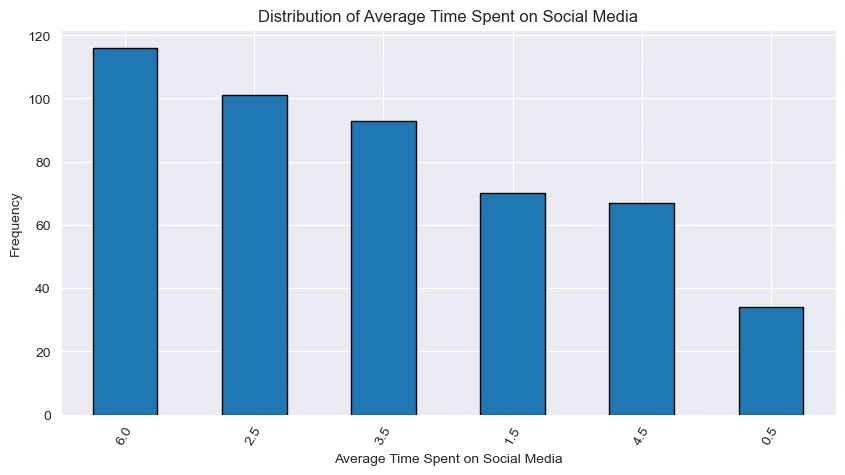

In [61]:
# Plot average time spent on social media by a bar chart
avg_time_spent_on_social_media_distribution = df['avg_time_spent_on_social_media'].value_counts()

plt.figure(figsize=(10, 5))
avg_time_spent_on_social_media_distribution.plot.bar(edgecolor='black')
plt.ylabel("Frequency")
plt.xlabel("Average Time Spent on Social Media")
plt.title("Distribution of Average Time Spent on Social Media")
plt.xticks(rotation=60)
plt.show()

As can be seen in the bar chart above, there is a large amount of people who spend more than 5 hours on social media, followed by 2-3 hours. Most people in this dataset spend a considerable amount of time on social media every day.

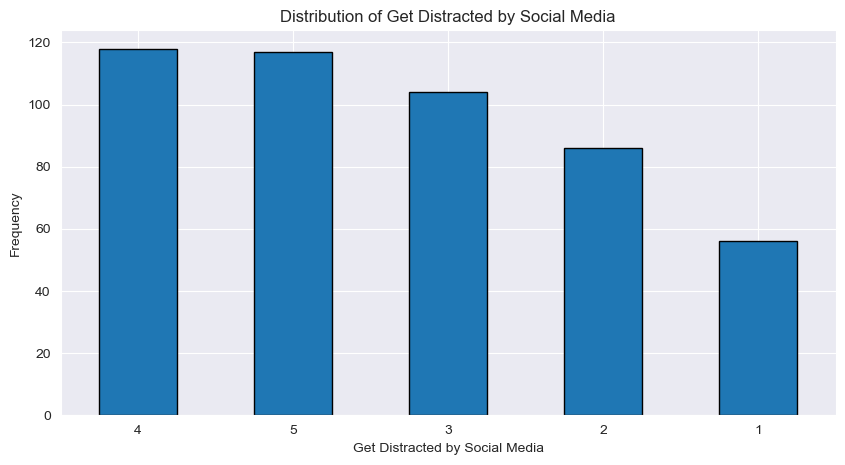

In [62]:
# Plot get distracted by social media by a bar chart
get_distracted_by_social_media_distribution = df['get_distracted_by_social_media'].value_counts()

plt.figure(figsize=(10, 5))
get_distracted_by_social_media_distribution.plot.bar(edgecolor='black')
plt.ylabel("Frequency")
plt.xlabel("Get Distracted by Social Media")
plt.title("Distribution of Get Distracted by Social Media")
plt.xticks(rotation=0)
plt.show()

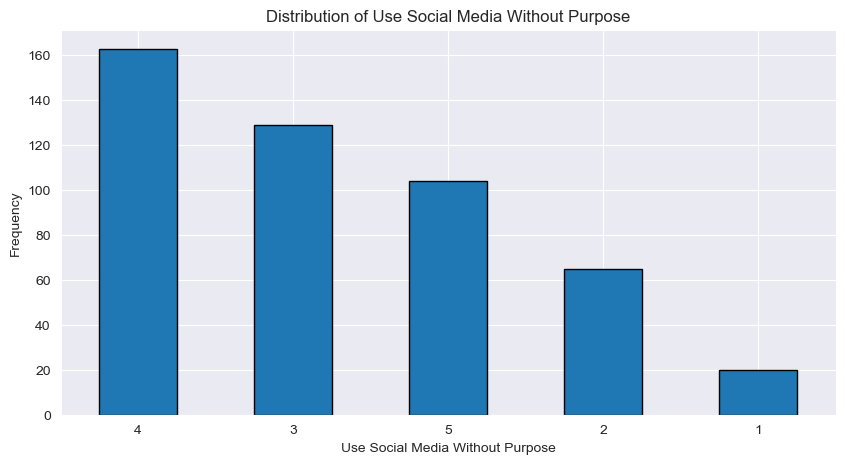

In [63]:
# Plot use social media without purpose by a bar chart
use_social_media_without_purpose_distribution = df['use_social_media_without_purpose'].value_counts()

plt.figure(figsize=(10, 5))
use_social_media_without_purpose_distribution.plot.bar(edgecolor='black')
plt.ylabel("Frequency")
plt.xlabel("Use Social Media Without Purpose")
plt.title("Distribution of Use Social Media Without Purpose")
plt.xticks(rotation=0)
plt.show()

Shown in the graph above, most people in this dataset feel they use social media without a purpose, as most people are at least rating their use at a 3. 
<br>
Let's see if this varies by age and gender.
<br>
*NOTE* The scale is 1-5, with 1 being the least often and 5 being the most often. For our purposes, we will classify anything at or above 3 as "often".

In [64]:
# Find average age of people who use social media without a purpose
df[df['use_social_media_without_purpose'] >= 3]['age'].mean()

25.16338383838384

People who are in their mid 20s report using social media without a purpose the most.

In [65]:
# Find gender that uses social media without a purpose the most
df[df['use_social_media_without_purpose'] >= 3]['gender'].value_counts()

gender
Female         222
Male           168
Nonbinary        1
NB               1
unsure           1
Trans            1
Non binary       1
Other            1
Name: count, dtype: int64

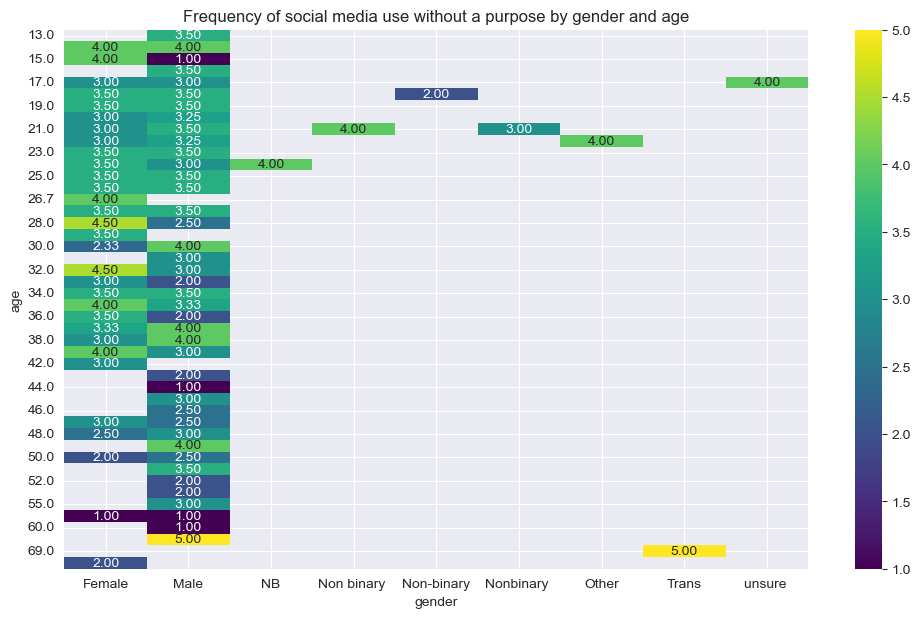

In [66]:
import seaborn as sns
# Plot use social media without purpose by age and gender using heatmap
freq_by_age_gender = df.groupby(['age', 'gender'])['use_social_media_without_purpose'].value_counts().reset_index(name='count')

pivot_table = freq_by_age_gender.pivot_table(index='age', columns='gender', values='use_social_media_without_purpose')
# pivot_table = pivot_table.fillna(0)

plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.2f')
plt.title("Frequency of social media use without a purpose by gender and age")
plt.xlabel("gender")
plt.ylabel("age")
plt.show()

# Exploratory Data Analysis

Let's see if there is a correlation between time spent on social media and feeling restless without social media.

Correlation between average time on social media and feelings of restlessness without it: 0.3959004311806471


<Figure size 1000x500 with 0 Axes>

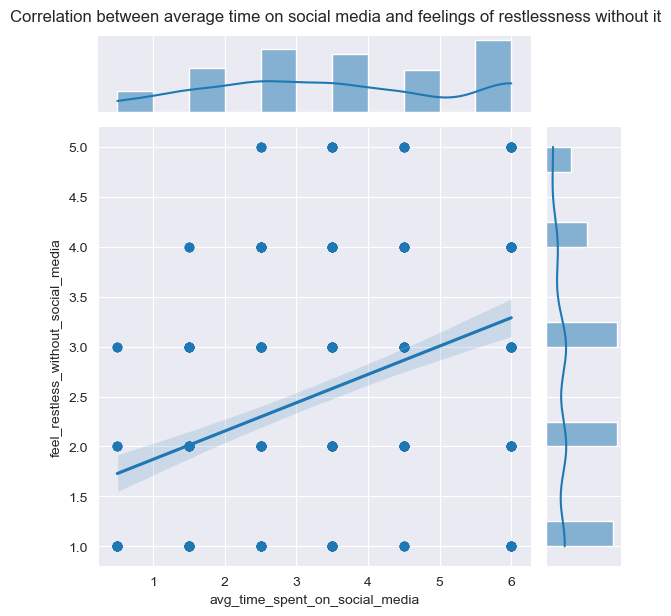

In [67]:
correlation = df['avg_time_spent_on_social_media'].corr(df['feel_restless_without_social_media'])
print(f'Correlation between average time on social media and feelings of restlessness without it: {correlation}')

# Plot the correlation between avg_time_spent_on_social_media and feel_restless_without_social_media
plt.figure(figsize=(10, 5))
sns.jointplot(x='avg_time_spent_on_social_media', y='feel_restless_without_social_media', data=df, kind='reg')
plt.suptitle("Correlation between average time on social media and feelings of restlessness without it", y=1.02)

plt.show()

As we can see, there is a weak positive correlation between the two variables, which could suggest that the more time you spend on social media, the more restless you feel without it.

Let's see if there is a correlation between time spent on social media and difficulty concentrating.

Correlation: 0.3124281626748452


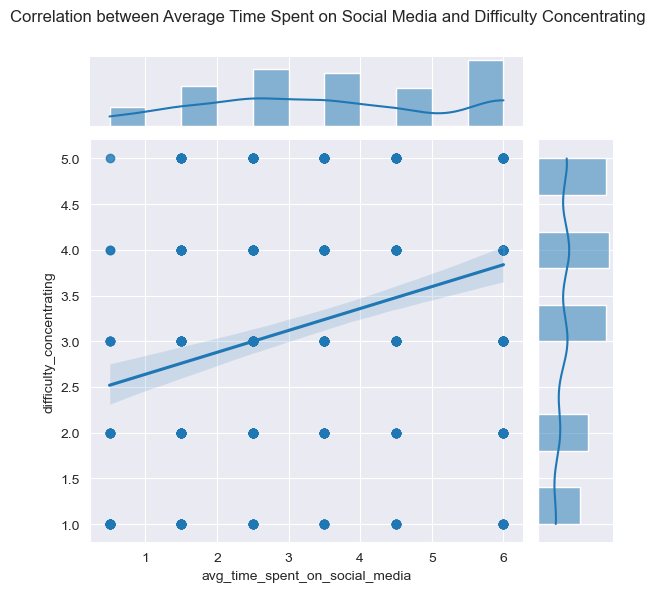

In [68]:
# Calculate the correlation
correlation = df['avg_time_spent_on_social_media'].corr(df['difficulty_concentrating'])
print(f'Correlation: {correlation}')

# Create a jointplot with regression line
sns.jointplot(x='avg_time_spent_on_social_media', y='difficulty_concentrating', data=df, kind='reg')

plt.subplots_adjust(top=0.9)
plt.suptitle("Correlation between Average Time Spent on Social Media and Difficulty Concentrating")
plt.show()

There is a __weak positive correlation__ between the two variables, which could suggest that the more time you spend on social media, the more difficulty you have concentrating.
<br>
Let's see if younger ages tend to get distracted more by social media when doing other activities

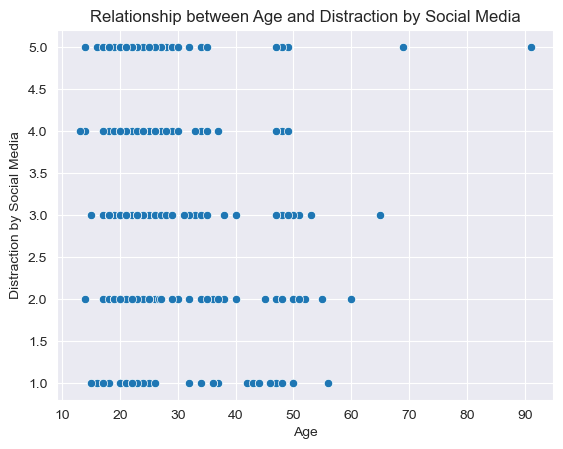

In [69]:
# Without regression line
sns.scatterplot(x='age', y='get_distracted_by_social_media', data=df)
plt.title("Relationship between Age and Distraction by Social Media")
plt.xlabel('Age')
plt.ylabel('Distraction by Social Media')
plt.show()

/Users/aidancone/anaconda3/envs/SMMH/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


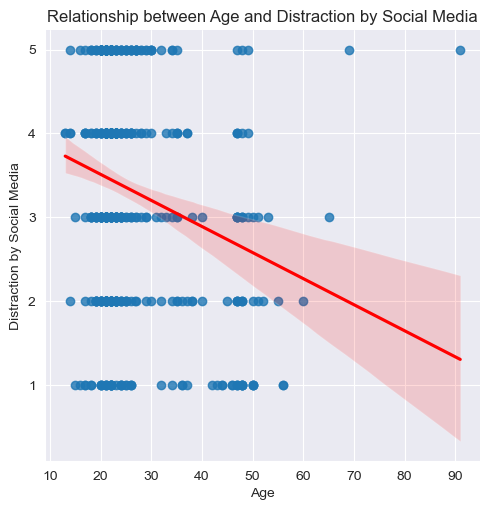

Correlation: -0.23220209242857817


In [70]:
# With regression line
sns.lmplot(x='age', y='get_distracted_by_social_media', data=df, line_kws={'color': 'red'})
plt.title("Relationship between Age and Distraction by Social Media")
plt.xlabel('Age')
plt.ylabel('Distraction by Social Media')
plt.show()

# Calculate the correlation
correlation = df['age'].corr(df['get_distracted_by_social_media'])
print(f'Correlation: {correlation}')

As we can see, there is a __weak negative correlation__ between the two variables, which could suggest that the younger you are, the more distracted you get by social media. This makes sense, as younger people tend to use social media more and typically without a purpose.

As we now know, sleep plays a big part in a person's health, and generally, the lower quality of sleep, the more feelings of irritability and depression one will feel. Let's see if we can look at the correlation between these two factors.

correlation: 0.3747260726354349


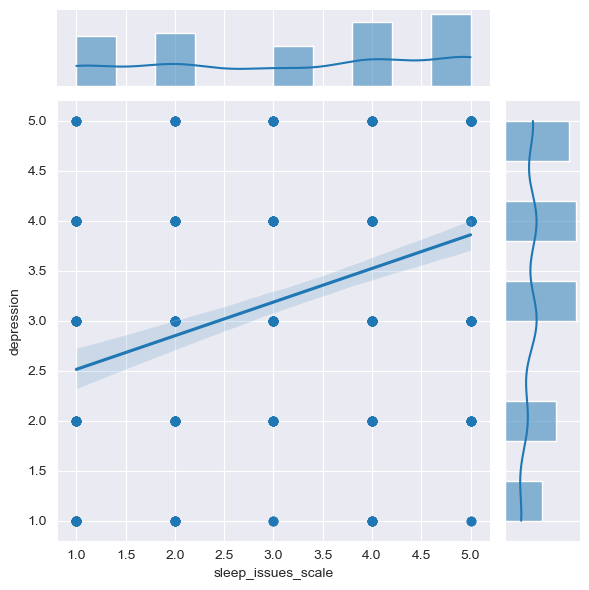

In [71]:
correlation = df['sleep_issues_scale'].corr(df['depression'])
print(f"correlation: {correlation}")

sns.jointplot(x='sleep_issues_scale', y='depression', data=df, kind="reg")
plt.show()

There is a weak positive correlation between feelings of depression and sleep issues, suggesting that the worse sleep someone gets, the more depressed they will feel.

# Advanced Analysis
<br>
In this section, we will perform advanced analysis including statistical tests and regression analysis. We
will also perform some KMeans clustering to group respondents together to extract more insight in the data.

Social media platform used could have an impact on one's ability to focus, as well as worry levels. YouTube is a platform for typically watching longer videos of people you don't know, whereas Instagram is for people you do know and for watching shorter videos, which could play into developing more distraction.

In [72]:
from scipy.stats import f_oneway

social_media_platforms = df['social_media_platforms']
distractibility = df['distractibility_scale']

platforms_data = {}
for platform in social_media_platforms.unique():
    platforms_data[platform] = distractibility[social_media_platforms == platform]

f_statistic, p_value = f_oneway(*platforms_data.values())
print("ANOVA for Distractibility:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA for Distractibility:
F-statistic: 1.2696969420938404
P-value: 0.047344447850293236


The p-value is 0.04, which is less than the significance threshold value of 0.05. Therefore, we can say that there is a statistically significant difference between the social media platforms and the distractibility of its users.

In [73]:
# Testing worry levels for different platforms
worry_levels = df['worry_scale']
platforms_data_worry = {}
for platform in social_media_platforms.unique():
    platforms_data_worry[platform] = worry_levels[social_media_platforms == platform]

f_statistic_worry, p_value_worry = f_oneway(*platforms_data_worry.values())
print("ANOVA for Worry Levels:")
print(f"F-statistic: {f_statistic_worry}")
print(f"P-value: {p_value_worry}")

ANOVA for Worry Levels:
F-statistic: 1.2805634465456277
P-value: 0.041722917961252916


The P-value for worry levels is also 0.04, less than the threshold of 0.05. This tells us that there is a statistically significant difference in the worry levels between users of different social media platforms.

# KMeans Clustering model
This model will aim to cluster the respondents into different clusters, hopefully revealing different attributes of the respondents in terms of mental health (depression, distractibility, worry etc.)

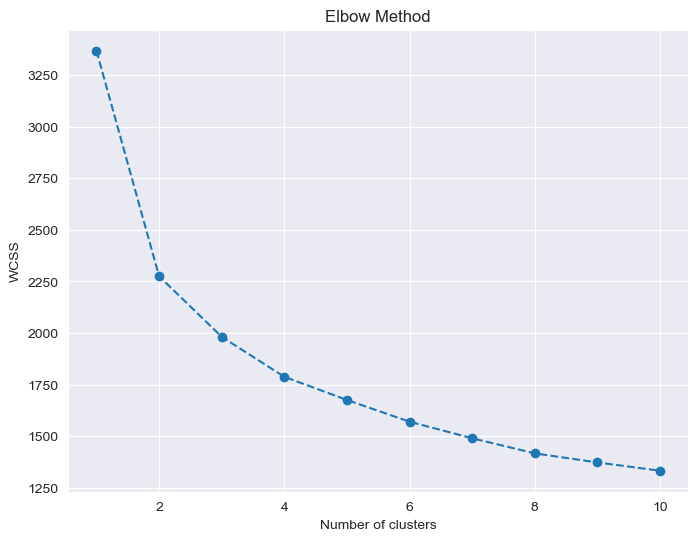

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Define features that will be included in the clustering model
features = ['avg_time_spent_on_social_media', 'use_social_media_without_purpose',
            'distractibility_scale', 'feel_restless_without_social_media',
            'worry_scale', 'depression', 'get_distracted_by_social_media']

# Select the features
df_features = df[features]

# Use StandardScaler to standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Use PCA to reduce the dimension of the data to 2 principal components
# This makes the input simpler and improves model performance
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

# Compute Within-Cluster-Sum of Squared Errors (WCSS) for different numbers of clusters (from 1 to 10)
# To identify the optimal number of clusters for KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Visualize the WCSS using "Elbow Method" to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

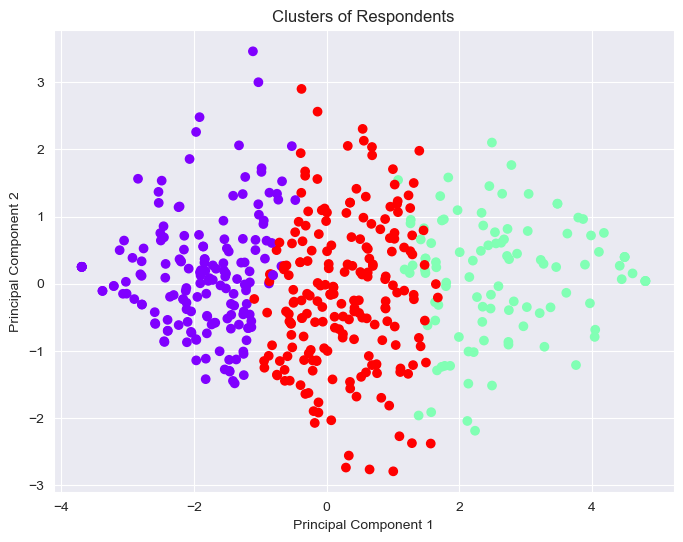

In [75]:
# Define the optimal number of clusters for KMeans (based on elbow method result)
optimal_num_clusters = 3

# Initialize and fit the KMeans clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit and predict the cluster labels for the dataset: Assigns a cluster to each sample in df_scaled
cluster_labels = kmeans.fit_predict(df_scaled)

# Add a new 'Cluster' column to the original dataframe, mapping each respondent to a cluster
df['Cluster'] = cluster_labels

# Plot a scatter plot of the two-dimensional dataset obtained from PCA, 
# color-coded based on the KMeans clustering result
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Clusters of Respondents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The leftmost cluster (purple, __cluster 0__) represents respondents with low-moderate average daily social media usage, with lower worry, depression, and distractibility levels.
<br>
The middle cluster (red, __cluster 1__) represents respondents with moderate-high social media daily average, with moderate worry, depression, and distractibility levels.
<br>
The rightmost cluster (green, __cluster 2__) represents respondents with the highest social media daily average, with high worry, depression, and distractibility levels.
<br> 
It is evident from this model that those with higher social media consumption per day typically have higher stress, depressive feelings, and distractibility.
<br> 
Let's see how many people who were put into __cluster 2__ have a bad sleep rating, which we will define as anything greater than or equal to '3'

In [76]:
# Filter data for cluster 2 and 'sleep_issues_scale' greater than 3
bad_sleep_in_cluster2 = df[(df['Cluster'] == 2) & (df['sleep_issues_scale'] >= 3)]

# Count the number of people in cluster 2 who have a bad sleep issue rating
count = bad_sleep_in_cluster2.shape[0]
total = df[df['Cluster'] == 2].shape[0]

print(f"In cluster 2, {count} out of {total} have a bad sleeping rating, or {round(count/total * 100)}%")

In cluster 2, 124 out of 205 have a bad sleeping rating, or 60%


A very large number of people who were clustered into cluster 2 self-reported as having bad sleep issues, which could contribute to their mental health.

Next, let's investigate the impact of social media use on self-reported depression using regression analysis.

In [77]:
import statsmodels.api as sm

# Define the dependent variable (y) and the independent variable (x)
y = df['depression']
x = df['avg_time_spent_on_social_media']

# In order to use statsmodels.regression we need to add a constant column representing the intercept
x = sm.add_constant(x)

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y, x)
results = model.fit()

# Print the summary:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     57.07
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.15e-13
Time:                        19:35:59   Log-Likelihood:                -785.93
No. Observations:                 481   AIC:                             1576.
Df Residuals:                     479   BIC:                             1584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

As we can see above, the P-value associated with the F-statistic is extremely small (2.15e-13) and '0' is not included in the 95% confidence interval. As a result of this test, there is strong evidence that average daily social media use has an impact on self-reported depression levels.

Correlation: 0.32627993788279336


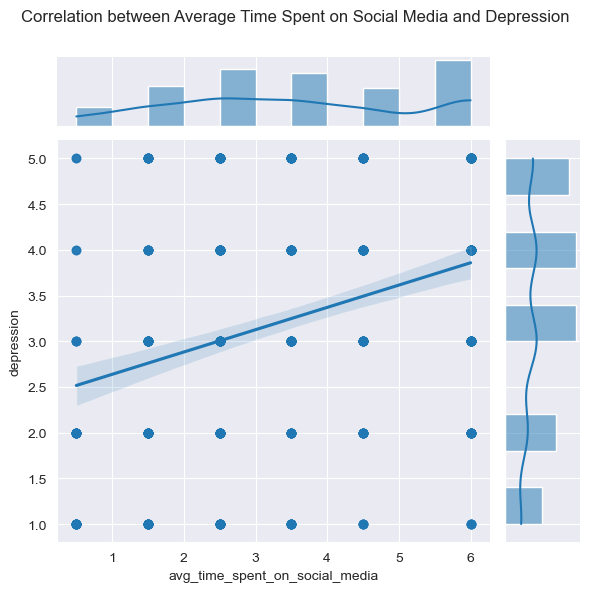

In [78]:
# Calculate the correlation
correlation = df['avg_time_spent_on_social_media'].corr(df['depression'])
print(f'Correlation: {correlation}')

# Plot the correlation
sns.jointplot(x='avg_time_spent_on_social_media', y='depression', data=df, kind='reg')

# Adjust the title position by changing `y` value
plt.subplots_adjust(top=0.9)
plt.suptitle("Correlation between Average Time Spent on Social Media and Depression")
plt.show()

Putting this onto a plot to visualize the correlation, we can see that the trend is positive. As the average time spent on social media increases, people typically report they are more depressed. This fits the regression analysis calculated above.

# Conclusion
The aim of this project was to gain insight into the relationship between social media use and mental health factors such as depression, worry/stress, restlessness, and sleep issues.
<br>
I performed one-way ANOVAs to determine if there is a statistically significant difference between social media platforms and corresponding worry and distractibility for the respondents. I found that there _is_ a statistically significant difference between social media platforms, suggesting that the use of any one social media platform could impact one's mental health more or less negatively than the use of another platform.
<br>
A K-means clustering model was applied on the dataset, which successfully partitioned respondents into clusters, where cluster 2 could be interpreted to represent people with worse mental health conditions associated with a higher daily average of social media use. Exploration of these clusters revealed interesting patterns, as there was a significant number of individuals with severe sleep issues within cluster 2.
<br>
In order to understand how the average time spent on social media influences the level of depression among users, a linear regression analysis was implemented. I found a significant positive relationship between average time spent on social media and depression levels among users. This indicates that as the average time spent on social media increases, depression levels also tend to increase.
<br>
Although the model sheds some light on the mental health implications of social media use, they come with limitations. For instance, while I controlled for certain factors in the model, there might be other uncontrolled variables that also play a role.